
found 2619 images.
Using 8 threads. (max:8)



100%|██████████| 2619/2619 [01:29<00:00, 29.22it/s]



*--------------------------------------------------------------------------------------*
number of images                         |  2619

dtype                                    |  uint8
channels                                 |  [3]
extensions                               |  ['jpg']

min height                               |  1232
max height                               |  2464
mean height                              |  1310.5582283314243
median height                            |  1232

min width                                |  1640
max width                                |  3280
mean width                               |  1744.574264986636
median width                             |  1640

mean height/width ratio                  |  0.7512195121951221
median height/width ratio                |  0.751219512195122
recommended input size(by mean)          |  [1312 1744] (h x w, multiples of 8)
recommended input size(by mean)          |  [1312 1744] (h x w, multiples of 16)
re

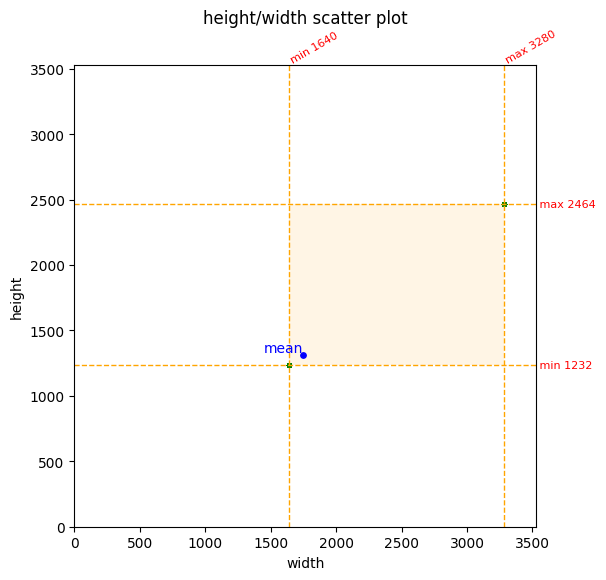

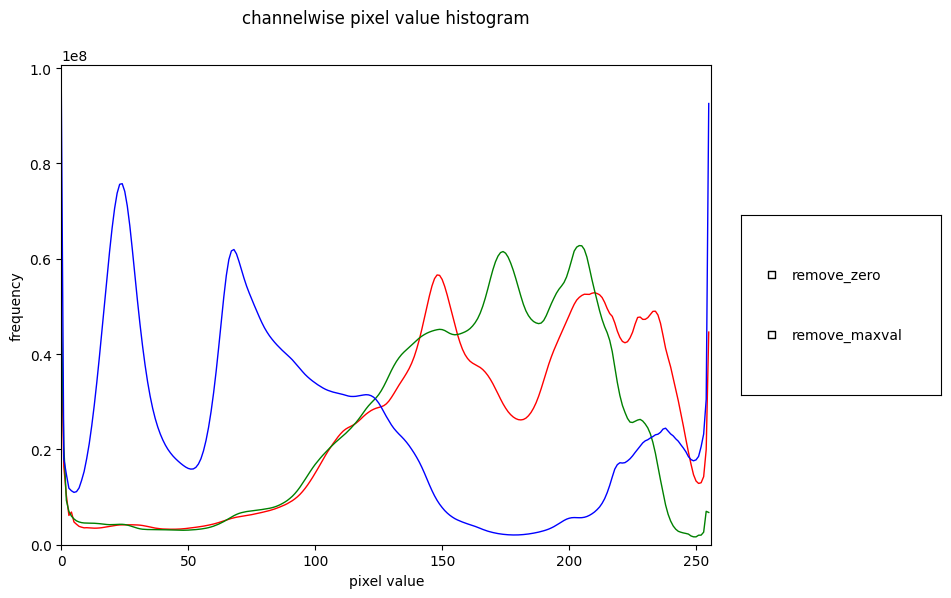

{'dtype': 'uint8',
 'channels': [3],
 'extensions': ['jpg'],
 'min_h': 1232,
 'max_h': 2464,
 'mean_h': 1310.5582283314243,
 'median_h': 1232,
 'min_w': 1640,
 'max_w': 3280,
 'mean_w': 1744.574264986636,
 'median_w': 1640,
 'mean_hw_ratio': 0.7512195121951221,
 'median_hw_ratio': 0.751219512195122,
 'rec_hw_size_8': array([1312, 1744]),
 'rec_hw_size_16': array([1312, 1744]),
 'rec_hw_size_32': array([1312, 1760]),
 'mean': array([0.641061  , 0.6118567 , 0.43524396], dtype=float32),
 'std': array([0.21588652, 0.19431339, 0.2736129 ], dtype=float32)}

In [9]:
from basic_image_eda import BasicImageEDA

data_dir = "../data"
extensions = ['png', 'jpg', 'jpeg']
threads = 0
dimension_plot = True
channel_hist = True
nonzero = False
hw_division_factor = 1.0

BasicImageEDA.explore(data_dir, extensions, threads, dimension_plot, channel_hist, nonzero, hw_division_factor)